In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go

from causallearn.search.ConstraintBased.PC import pc
from causallearn.search.ConstraintBased.FCI import fci

from causallearn.utils.GraphUtils import GraphUtils
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import io


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
)
from sklearn.preprocessing import StandardScaler


In [ ]:
depression = pd.read_csv("../../data/Student Depression Dataset.csv")
depression

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,5-6 hours,Unhealthy,Class 12,Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,Less than 5 hours,Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,5-6 hours,Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,Less than 5 hours,Healthy,Class 12,Yes,10.0,5.0,No,1


In [3]:
depression = depression.dropna()
depression = depression.replace({'Yes': 1, 'No': 0})

In [4]:
data_encoded_2 = pd.get_dummies(depression, drop_first=True)
data_encoded_2

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,...,Degree_MA,Degree_MBA,Degree_MBBS,Degree_MCA,Degree_MD,Degree_ME,Degree_MHM,Degree_MSc,Degree_Others,Degree_PhD
0,2,33.0,5.0,0.0,8.97,2.0,0.0,1,3.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,8,24.0,2.0,0.0,5.90,5.0,0.0,0,3.0,2.0,...,0,0,0,0,0,0,0,0,0,0
2,26,31.0,3.0,0.0,7.03,5.0,0.0,0,9.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,30,28.0,3.0,0.0,5.59,2.0,0.0,1,4.0,5.0,...,0,0,0,0,0,0,0,0,0,0
4,32,25.0,4.0,0.0,8.13,3.0,0.0,1,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,27.0,5.0,0.0,5.75,5.0,0.0,1,7.0,1.0,...,0,0,0,0,0,0,0,0,0,0
27897,140686,27.0,2.0,0.0,9.40,3.0,0.0,0,0.0,3.0,...,0,0,0,0,0,0,0,1,0,0
27898,140689,31.0,3.0,0.0,6.61,4.0,0.0,0,12.0,2.0,...,0,0,0,0,1,0,0,0,0,0
27899,140690,18.0,5.0,0.0,6.88,2.0,0.0,1,10.0,5.0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
depression = depression.dropna()
data_encoded = pd.get_dummies(depression, drop_first=True)
data_encoded = data_encoded[['Academic Pressure', 'Have you ever had suicidal thoughts ?',
 'Financial Stress', 'City_Ahmedabad', 'City_Bhopal', 'City_Faridabad',
 'City_Hyderabad', 'City_Meerut', 'City_Patna', 'Dietary Habits_Moderate',
 'Dietary Habits_Others', 'Dietary Habits_Unhealthy', 'Depression']]
data_encoded

,Academic Pressure,Have you ever had suicidal thoughts ?,Financial Stress,City_Ahmedabad,City_Bhopal,City_Faridabad,City_Hyderabad,City_Meerut,City_Patna,Dietary Habits_Moderate,Dietary Habits_Others,Dietary Habits_Unhealthy,Depression
0,5.0,1,1.0,0,0,0,0,0,0,0,0,0,1
1,2.0,0,2.0,0,0,0,0,0,0,1,0,0,0
2,3.0,0,1.0,0,0,0,0,0,0,0,0,0,0
3,3.0,1,5.0,0,0,0,0,0,0,1,0,0,1
4,4.0,1,1.0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,5.0,1,1.0,0,0,0,0,0,0,0,0,1,0
27897,2.0,0,3.0,0,0,0,0,0,0,0,0,0,0
27898,3.0,0,2.0,0,0,1,0,0,0,0,0,1,0
27899,5.0,1,5.0,0,0,0,0,0,0,0,0,0,1


# Fisherz Graph

  0%|          | 0/13 [00:00<?, ?it/s]

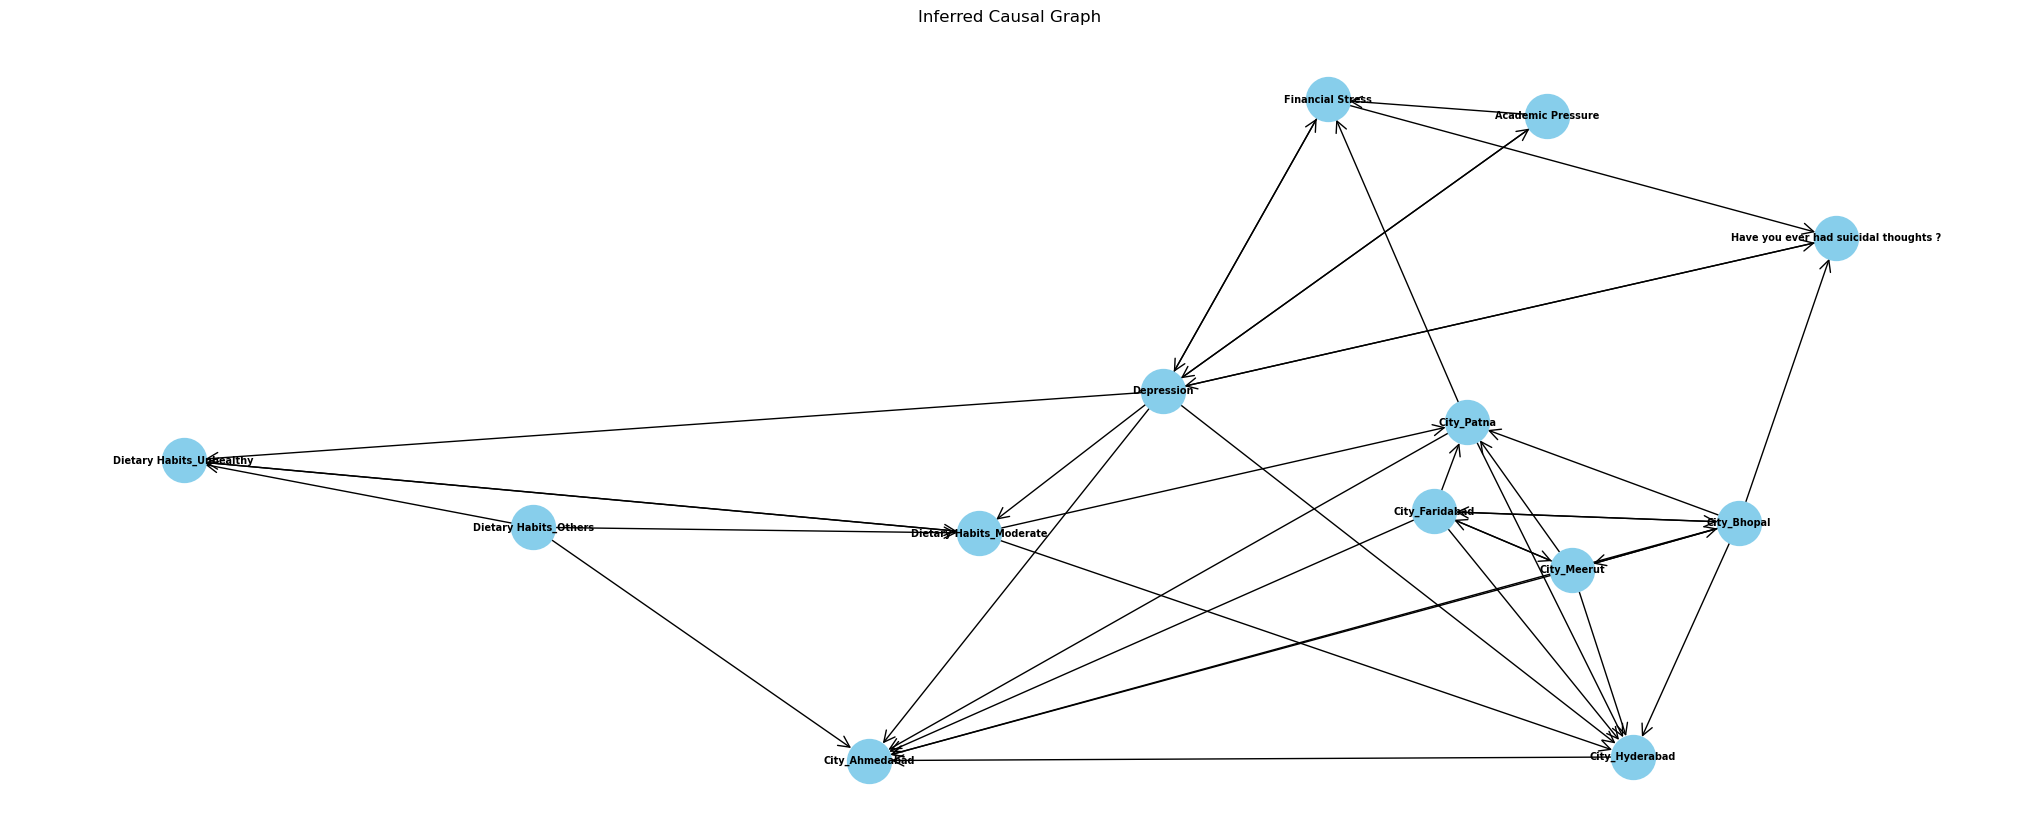

In [6]:
data_frame = data_encoded
# Step 1: Convert DataFrame to NumPy array>
data_array = data_frame.to_numpy()

# Step 2: Apply the PC algorithm to discover the causal graph
alpha = 0.05  # Significance level
pc_graph = pc(data_array, alpha)

# Step 3: Create labels for nodes based on DataFrame columns
node_labels = {i: col for i, col in enumerate(data_encoded.columns)}

# Step 4: Extract edges from the pc_graph and create a NetworkX directed graph
G = nx.DiGraph()
G.add_nodes_from(node_labels.keys())

# Add edges based on the adjacency matrix
for i in range(len(pc_graph.G.graph)):
    for j in range(len(pc_graph.G.graph)):
        if pc_graph.G.graph[i, j] != 0:  # Check for an edge
            if pc_graph.G.graph[j, i] == 1 and pc_graph.G.graph[i, j] == -1:
                # Case: i -> j
                G.add_edge(i, j, edge_type='directed')
            elif pc_graph.G.graph[j, i] == -1 and pc_graph.G.graph[i, j] == -1:
                # Case: i -- j (undirected)
                G.add_edge(i, j, edge_type='undirected')
            elif pc_graph.G.graph[j, i] == 1 and pc_graph.G.graph[i, j] == 1:
                # Case: i <-> j (bidirectional)
                G.add_edge(i, j, edge_type='bidirectional')
# Step 5: Plot the graph
plt.figure(figsize=(20, 8))
pos = nx.spring_layout(G, k=0.5, iterations=50)  # Increase k for more space between nodes
nx.draw(G, pos, with_labels=True, labels=node_labels, node_size=1000, node_color="skyblue", font_size=7, font_weight="bold", arrowstyle="->", arrowsize=20)
plt.title("Inferred Causal Graph")
plt.show()

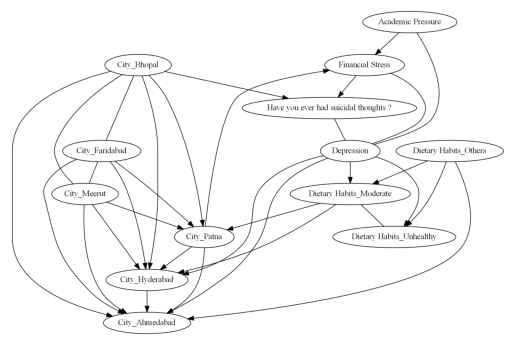

In [8]:
# Visualization using pydot
from causallearn.utils.GraphUtils import GraphUtils
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import io

pyd = GraphUtils.to_pydot(pc_graph.G, labels=node_labels)
tmp_png = pyd.create_png(f="png")
fp = io.BytesIO(tmp_png)
img = mpimg.imread(fp, format='png')
plt.axis('off')
plt.imshow(img)
plt.show()


FisherZ : Related to Depression
--------------------------------
- Parents: Academic Pressure, Financial Stress, Have you ever had suicidal thoughts 
- Children: Dietary Habits_Unhealthy, Dietary Habits_Moderate, City_Hyderabad, City_Ahmedabad
- Spouse: Dietary Habits_Others, City_Meerut

# ChiSquared

  0%|          | 0/13 [00:00<?, ?it/s]

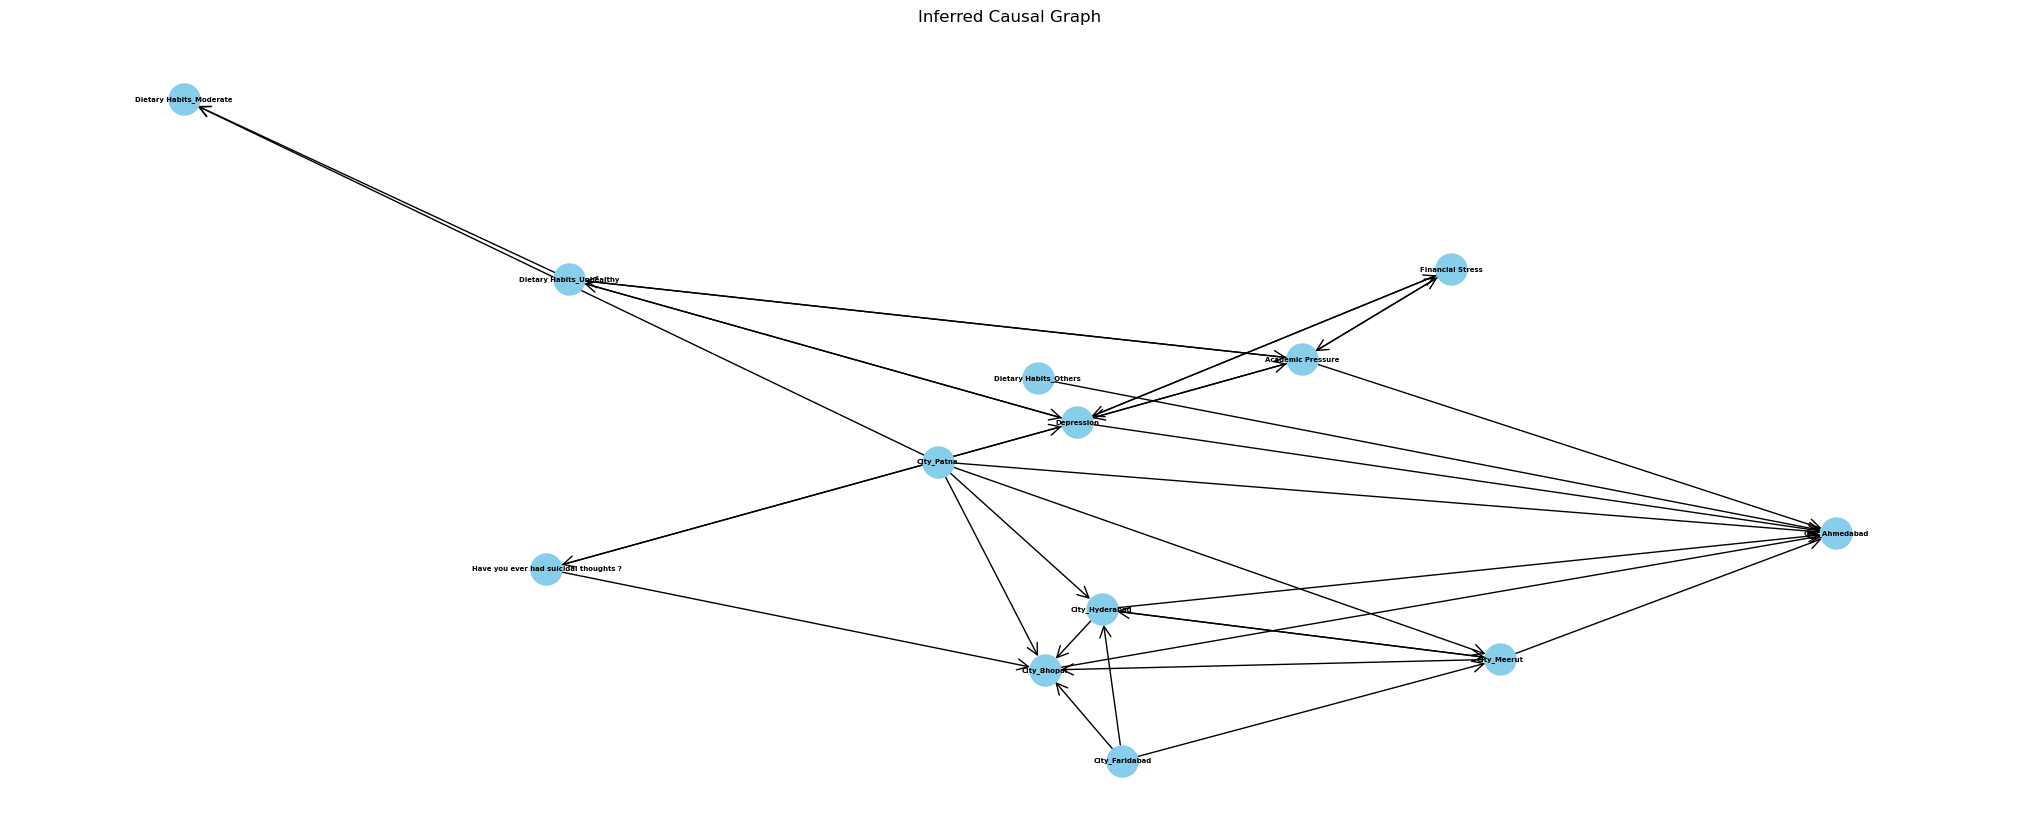

In [15]:
    data_frame = data_encoded
    # Step 1: Convert DataFrame to NumPy array>
    data_array = data_frame.to_numpy()

    # Step 2: Apply the PC algorithm to discover the causal graph
    alpha = 0.05  # Significance level
    pc_graph = pc(data_array, alpha, indep_test = 'chisq')

    # Step 3: Create labels for nodes based on DataFrame columns
    node_labels = {i: col for i, col in enumerate(data_encoded.columns)}

    # Step 4: Extract edges from the pc_graph and create a NetworkX directed graph
    G = nx.DiGraph()
    G.add_nodes_from(node_labels.keys())

    # Add edges based on the adjacency matrix
    for i in range(len(pc_graph.G.graph)):
        for j in range(len(pc_graph.G.graph)):
            if pc_graph.G.graph[i, j] != 0:  # Check for an edge
                if pc_graph.G.graph[j, i] == 1 and pc_graph.G.graph[i, j] == -1:
                    # Case: i -> j
                    G.add_edge(i, j, edge_type='directed')
                elif pc_graph.G.graph[j, i] == -1 and pc_graph.G.graph[i, j] == -1:
                    # Case: i -- j (undirected)
                    G.add_edge(i, j, edge_type='undirected')
                elif pc_graph.G.graph[j, i] == 1 and pc_graph.G.graph[i, j] == 1:
                    # Case: i <-> j (bidirectional)
                    G.add_edge(i, j, edge_type='bidirectional')
                    # Step 5: Plot the graph
    plt.figure(figsize=(20, 8))
    pos = nx.spring_layout(G, k=0.5, iterations=50)  # Increase k for more space between nodes
    nx.draw(G, pos, with_labels=True, labels=node_labels, node_size=500, node_color="skyblue", font_size=5, font_weight="bold", arrowstyle="->", arrowsize=20)
    plt.title("Inferred Causal Graph")
    plt.show()

In [13]:
# Visualization using pydot


pyd = GraphUtils.to_pydot(G, labels=node_labels)
tmp_png = pyd.create_png(f="png")
fp = io.BytesIO(tmp_png)
img = mpimg.imread(fp, format='png')
plt.axis('off')
plt.imshow(img)
plt.show()

AttributeError: 'DiGraph' object has no attribute 'get_nodes'

ChiSq : Related to Depression
--------------------------------
- Parents: Financial Stress, Academic Pressure, Dietary Habits_Moderate, Dietary Habits_Unhealthy, Have you ever had suicidal thoughts ?
- Children: City_Ahmedabad
- Spouse:  City_Meerut, City_Hyderabad, City_Bhopal, City_Patna, Dietary Habits_Others

In [50]:
    data_frame = data_encoded
    # Step 1: Convert DataFrame to NumPy array>
    data_array = data_frame.to_numpy()

    # Step 2: Apply the PC algorithm to discover the causal graph
    alpha = 0.05  # Significance level
    cg, _  = fci(data_array, alpha = alpha, indep_test = 'chisq')

    # Step 3: Create labels for nodes based on DataFrame columns
    node_labels = {i: col for i, col in enumerate(data_encoded.columns)}

  0%|          | 0/13 [00:00<?, ?it/s]

X13 --> X1
X2 --> X13
X3 --> X13


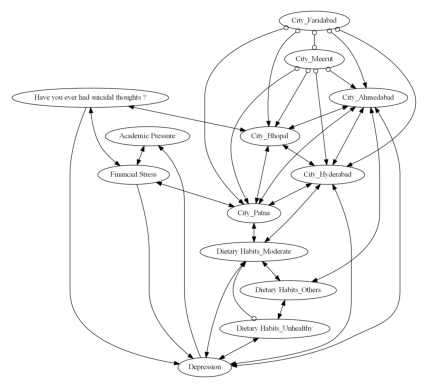

# FCI done with Chisq
------------------------
- Parents: Financial Stress, Have you evr had suicidal thoughts ?, City_Ahmedabad, Dietary Habits_Moderate
- Children: Academic Pressure
- Spouse: --

Done with a PC algorithm
In general;
- suicidal thoughts appear to be directly related to age + financial stress
- seems like the algorithm has found that a lot of things affect age(as a parent) even though we know that age is independent
-- includes academic pressure, work/study hours, financial stress
- unhealthy dietary habits and family history of mental illness related to gender(male)
- sleep was a bit related to diet habits but not too much

Causal graph of relating to Depression:
- Age, Financial Stress, Sleep Duration, Dietary Habits, Sucidal thoughts, and family history all seem to be direct factors for depression
- depression can go out to affect Academic Pressure, CGPA, Study Satisfaction/Work Hours
- and Age is soemthing that seems to affect those as well

Do we ask?
Are some factors (e.g., financial stress or sleep duration) stronger predictors of depression than others?
With the common sense we have, we can see that it would be more likely that age affects work/study hours, stress more than the other way around, what seems to be the work around?
- are we doing it wrong, Why might the PC algorithm link age to variables like academic pressure and work/study hours? Could this be due to data limitations or a spurious correlation in the dataset?

Are there feedback loops where depression worsens factors like CGPA, which then loop back to increase depression?


surescreening, lasso

figure out a cutoff of interest for the variables

Active Noise Model